# Гипотезы бывают: о виде распределения (критерии согласия), о однородности, о независимости, о случайности
https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests

<strong>Автор:</strong> Маркашева Вера Алексеевна\
Косметические изменения: Царюк Артем Владимирович

Критерии согласия: Колмогорова, Хи-квадрат, критерий квантилей и так далее

Критерии нормальности: Жарки-Бера, Шапиро-Уилка, критерий квантилей реализуется на QQ-plot

Критерии однородности: Смирнова, хи-квадрат

Критерии независимости: Хи-квадрат, Спирмена, Кендалла

Критерии случайности: критерий инверсий

#  Простые гипотезы 

Умение тестировать статистические гипотезы – один из наиболее востребованных навыков аналитика. Давайте приведем пример. Мы сделали новую модель, которая умеет предсказывать, совершит ли покупку на сайте человек в ближайшую неделю. Как проверить, что мы хорошо научились угадывать? Очень просто - давайте для наших пользователей сгенерируем предсказания модели, а потом сравним эти предсказания с фактом покупок. Логично. Наша модель будет полезна, если она работает лучше, чем случайная угадайка (1/2, что купит и 1/2, что не купит). 

Давайте проверим гипотезу, что наша модель == подбрасывание монетки. Говорят данные в пользу такого утверждения или против него?


Проверка гипотезы формализуется так:

**Выборка**   $X_n = {X_1 ... X_n}$ из неизвестного распределения $X \sim P$

**Нулевая гипотеза**    $H_0: P \in \omega$ ,  где $\omega$ - известное семейство распределений

**Альтернативная гипотеза**     $H_1: P \notin \omega$ 

**Статистика**    $T(X_n)$

**Нулевое распределение**    $F(T)$ - распределение статистики в случае справедливости $H_0$

Если справедлива гипотеза $H_1$ , то распределение нашей статистики имеет ДРУГОЕ распределение, не  $F(T)$

**Определение** *p-value* или достигаемый уровень значимости это вероятность получить такое же или еще более экстремальное значение статистики $T(X_n)$, чем было получено в эксперименте, при условии справедливости $H_0$

То есть если p-value достаточно мало, это значит, что данные свидетельствуют ПРОТИВ нулевой гипотезы, потому что вероятность получить такое значение при ее справедливости – маленькая величина. Обычно p-value сравнивают с наперед заданным уровнем значимости $\alpha$, которы обычно берется за 0.05 или 0.01. Ну и если $p-value < \alpha$, говорят, что нулевая гипотеза ОТВЕРГАЕТСЯ в пользу альтернативы.

При тестировании гипотез существуют два вида ошибок: неверно отклоняется или неверно принимается гипотеза. В тестировании гипотез считается, что ошибка первого рода критичнее, так как вероятность отвержения нулевой гипотезы оказывается ограниченной сверху нашим уровнем значимости:
$$P(\text{ошибка первого рода})\le\alpha$$

Ошибки второго рода так явно не минимизируются. Вероятность ошибки второго рода напрямую связана с понятием мощности статистического критерия,  то есть:
$$P(\text{вероятность отвергнуть $H_0$}|H_1) = 1 - P(\text{вероятность принять $H_0$}|H_1)$$

То есть среди всех подходящих критериев мы должны выбрать тот, у которого максимальная мощность.

Даже в терминологии здесь видна несимметричность. Если достигаемый уровень значимости меньше $\alpha$, то гипотеза $H_0$ отвергается, а если не меньше, то НЕ отвергается (а не принимается, как ожидалось). То есть это не доказательство того, что $H_0$ верна.

## Размер эффекта

Когда мы проводим тестирование гипотез, нас на самом деле интересует некий дополнительный эффект, который мы можем получить за счет тестируемой функциональности, например кол-во дополнительных заказов от новой программы лояльности, увеличение длины диалога с голосовым помощником от новой диалоговой механики или добавочная вероятность выздоровления от применения нового способа лечения болезни. Мы с вами не можем оценить этот эффект на всей генеральной совокупности и поэтому оцениваем его по выборке. Вот тут-то нам и пригождается достигаемый уровень значимости, чтобы понять, с какой вероятностью такой же эффект можно было бы получить случайно.

p сильно зависит не только от размера эффекта, но и от размера выборки. На больших выборках вы будете замечать все более и более тонкие отклонения от нулевой гипотезы и при каком-то n почти все $H_0$ будут отвергаться.

Поэтому эффект часто надо оценивать с прикладной точки зрения. Например если в течение трех лет регулярные тренировки в спортзале по некой системе помогли людям с ожирением снизить массу тела в среднем на 200 граммов и этот эффект статистически значим, представляется весьма сомнительным, что кто-либо желающий похудеть получит от такой цифры моральное удовлетворение. А значит в контексте похудения этот эффект практически бесполезен.

С другой стороны, не все статистически не значимые эксперименты бессмысленны. Скажем, если вы изобрели новое лекарство от вируса COVID-19, протестировали его на добровольцах, оно показывает хорошие результаты (люди выздоравливают, побочных эффектов нет), но при этом результат не стал статистически значимым, это не повод все бросить. Исследования стоит продолжать, потому что практически такой эффект может оказаться значимым. Возможно вам стоит подумать об уменьшении дисперсии в вашем исследовании.

В любом случае, статистически значимый результат дает нечто, на что можно опираться, как на наиболее вероятное событие в будущем.
Уровень значимости стоит понимать как минимум как меру доверия к возможному событию.

# Гипотеза о виде распределения

# Параметрические критерии 
Так называют критерии, которые делают некие предположения о характере распределений. А мы, в частности, будем оценивать какие-либо параметры этих распределений. Начнем с проверки гипотез, связанных с признаками, распределенными нормально. Начнем с так называемых критериев Стьюдента о математических ожиданиях. 

## Биномиальный тест для доли

## Lady tasting tea experiment

Известный статистик Рональд Фишер провел эксперимент, в котором предложил даме 8 чашек чая, в 4 из которых сначала добавили чай, а потом молоко, а в 4 другие – наоборот (сначала молоко, потом чай). Ей необходимо было разбить чашки на две группы (первым было молоко или первым был чай). Проверялась гипотеза о том, что дама случайно угадывает, что было налито первым. В ходе анализа этого эксперимента Фишер придумал так называемый [Точный тест Фишера](https://ru.wikipedia.org/wiki/Точный_тест_Фишера), а дама подтвердила свое умение определять, что было первым налито в чашку.

Проведем эксперимент чуть иначе. Предложим даме 20 чашек (по две за раз) и будем спрашивать в какой чашке из пары сначала налито молоко. Тогда наш эксперимент - бинарный вектор длины 10 (допустим 0 - налит чай, а 1 -налито молоко).

Если нулевая гипотеза о выборе наугад справедлива , то мы равновероятно можем получить любой из $2^n$ бинарных векторов длины $n$. 

Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора чая, в который сначала налито молоко – $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Значит наше нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Мы уже сказали, что $n=10.$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab
from scipy import stats
import scipy

In [2]:
n = 10
F_H0 = stats.binom(n, 0.5)

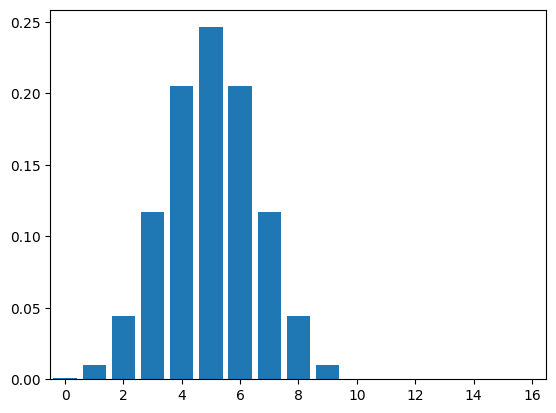

In [3]:
x = np.linspace(0,9,10)

pylab.bar(x, F_H0.pmf(x))
pylab.xlim(-0.5, 16.5) 
pylab.show()

## Односторонняя альтернатива

Означает, что мы проверяем гипотезу, что дама угадывает лучше чем случайный классификатор (чаще действительно угадывает молоко).


In [4]:
stats.binomtest(9, 10, 0.5, alternative = 'greater')

BinomTestResult(k=9, n=10, alternative='greater', statistic=0.9, pvalue=0.0107421875)

## Двусторонняя альтернатива

Означает, что мы проверяем гипотезу, что угадывает не как случайный классификатор (или чаще действительно угадывает молоко или чаще вместо молока указывает на чай)

In [5]:
stats.binomtest(9, 10, 0.5, alternative = 'two-sided')

BinomTestResult(k=9, n=10, alternative='two-sided', statistic=0.9, pvalue=0.021484375)

Заметьте, что и в первом случае для стат.значимости надо угадать 9 раз из 10, а во втором - или угадать 9 раз или ошибиться 9 раз.

## Связь с доверительными интервалами

Понятно, что тестирование гипотез напрямую связано с построением доверительных интервалов. Возьмем задачку о сравнении классификатора на сбалансированной выборке(50 на 50) с подбрасыванием монетки (генератором случайных чисел). Если построить 95% доверительный интервал для доли  верно угаданных ответов и он не будет содержать 0.5 (вероятность случайного угадывания), можно смело утверждать, что на уровне 95% гипотеза об идентичности вашего классификатора и генератора случайных чисел отвергается. 

**Выборка**    $X_n = {X_1 ... X_n}$ из неизвестного распределения $X \sim P$

**Нулевая гипотеза**    $H_0: \theta = \theta_0$

**Альтернативная гипотеза**     $H_1: \theta \not= \theta_0$ 


$H_0$ отвергается на уровне значимости $100(1-\alpha)$, если доверительный интервал для $\theta$ не содержит $\theta_0$

*p-value* здесь можно найти численно как такое значение $\alpha$, что $\theta_0$ будет попадать ровно на границу доверительного интервала.

Пусть у нас есть ответы классификатора для задачи с двумя сбалансированными выборками. Будем обозначать правильный ответ за 1, а неправильный - за 0. На тестовой выборке длины 1000 классификатор верно угадал 600 из 1000 ответов. Лучше ли он, чем бросание монетки?

In [6]:
stats.binomtest(600, 1000, 0.5, alternative = 'greater')

BinomTestResult(k=600, n=1000, alternative='greater', statistic=0.6, pvalue=1.3642320780330123e-10)

# Как проверить нормальность (и вообще принадлежность к распределению)


Мы до сих пор работали в предположении, что наша выборка взята из нормального распределения. На самом деле, это утверждение неплохо было бы проверять. Например это можно сделать с помощью критерия Хи-квадрат. Здесь мы его применим для сравнения с нормальным распределением, но вообще он годится для проверки соответствия распределения ЛЮБОМУ заданному теоретическому закону.

## Критерий согласия $\chi^2$


**Выборка**    $X_n = {X_1 ... X_n}$ из нормального распределения , при этом $\sigma$ неизвестно.

**Нулевая гипотеза**    $H_0: X \sim N(\mu,\sigma^2)$

**Альтернативная гипотеза**     $H_1: X \not\sim N(\mu,\sigma^2)$ 

Мы разбиваем область определения нашей величины на $K$ бинов (интервалов/бакетов/карманов). Границы этих интервалов – $a_i$. Подсчитаем следующие значения:

$n_i$ - количество элементов нашей выборки в интервале $[a_i,a_{i+1}]$

$p_i$ - вероятность попадания значения в интервал $[a_i,a_{i+1}]$ при условии справедливости $H_0$. Нам для этого надо будет взять функцию нормального распределения и посчитать ее разность в точках $a_i$ и $a_{i+1}$:

$p_i = F_{N(\mu,\sigma^2)}(a_{i+1}) - F_{N(\mu,\sigma^2)}(a_{i})$





**Статистика** $\chi^2(X_n) = \sum^{K}_{i=1}\dfrac{(n_i-np_i)^2}{np_i}$

**Нулевое распределение** $\chi^2(X_n) = \begin{cases} \chi^2_{K-1}, & \text{Если нам известны $\mu$ и $\sigma$} \\ \chi^2_{K-3}, & \text{Если $\mu$ и $\sigma$ мы оцениваем по выборке} \end{cases}$


Давайте для примера возьмем выборку из нормального распределения с параметрами $\mu$ и $\sigma$ и добавим к ней случайный шум $\sim exponential(1)$. То есть наша случайная величина будет иметь распределение:
$$X \sim N(\mu,\sigma^2)+exponential(1)$$

Пусть, например, 

In [7]:
size = 5000
bins = 20

np.random.seed(31)
sample = np.array([pylab.normal(70, 5) + pylab.exponential(1) for _ in range(size)])

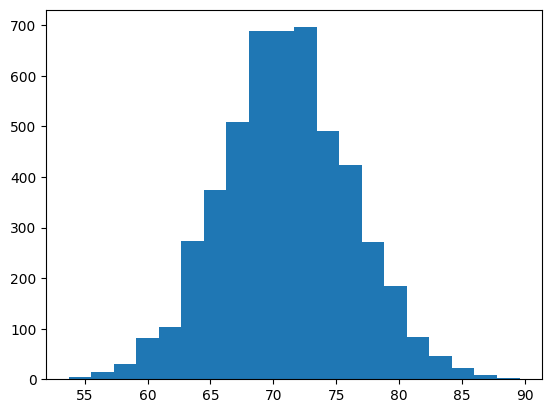

In [8]:
from matplotlib.pyplot import hist
from scipy.stats import norm

h1 = hist(sample, bins = bins)

In [9]:
intervals = np.linspace(min(sample), max(sample), bins)

In [10]:
from scipy.stats import chisquare

In [11]:
expected = []
observed = []
for i in range(1, len(intervals)):
    observed.append(len(sample[(sample < intervals[i]) & (sample >= intervals[i - 1])]))
    expected.append((norm.cdf(intervals[i], 70, 5) - norm.cdf(intervals[i - 1], 70, 5)) * len(sample))

In [12]:
np.array(expected).sum()

4996.967652014366

In [13]:
expected = np.array(expected)
expected[-1] = expected[-1] + size - expected.sum()

In [14]:
np.array(observed).sum()

4999

In [15]:
observed = np.array(observed)
observed[-1] = observed[-1] + size - observed.sum()

<BarContainer object of 19 artists>

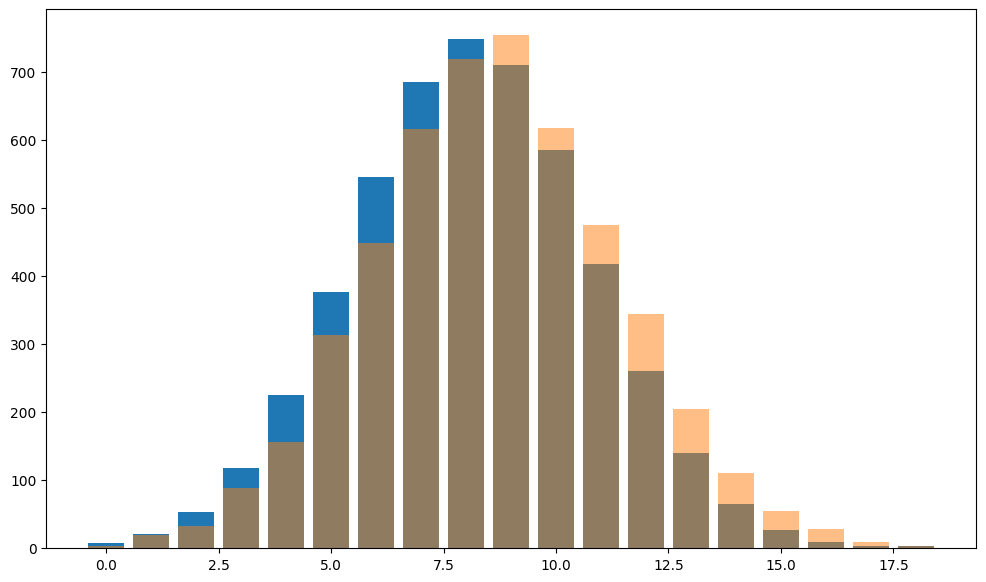

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (12, 7))

ax.bar(range(len(expected)), expected)
ax.bar(range(len(observed)), observed, alpha = .5)


In [17]:
((np.array(observed) - np.array(expected)) ** 2 / np.array(expected)).sum()

253.73532675216688

In [18]:
observed.sum()


5000

In [19]:
expected.sum()

5000.0

In [20]:
chisquare(observed, expected)


Power_divergenceResult(statistic=253.73532675216688, pvalue=1.417119765427208e-43)

Наш тест уверенно отвергает нормальность с параметрами 70 и 5. В самом деле - распределение перекосило вправо. Давайте теперь оценим параметры нашего распределения по выборке. При этом кол-во степеней свободы уменьшается на 2. У распределения Хи-квадрат берется интеграл по правому хвосту от полученного в эксперименте значения статистики и до бесконечности.

In [21]:
std = np.std(sample)
mu = np.mean(sample)

In [22]:
std, mu

(5.160590834308837, 71.02642515038143)

In [23]:
expected = []
observed = []
for i in range(1, len(intervals)):
    observed.append(len(sample[(sample < intervals[i]) & (sample >= intervals[i - 1])]))
    expected.append((norm.cdf(intervals[i], mu, std) - norm.cdf(intervals[i-1], mu, std)) * len(sample))

In [24]:
len(observed)

19

In [25]:
((np.array(observed) - np.array(expected)) ** 2 / np.array(expected)).sum()

14.171790988364513

In [26]:
chisquare(observed, np.array(expected) * np.mean(observed) / np.mean(expected), ddof = 2)

Power_divergenceResult(statistic=14.166096311096862, pvalue=0.5863414492872022)

<BarContainer object of 19 artists>

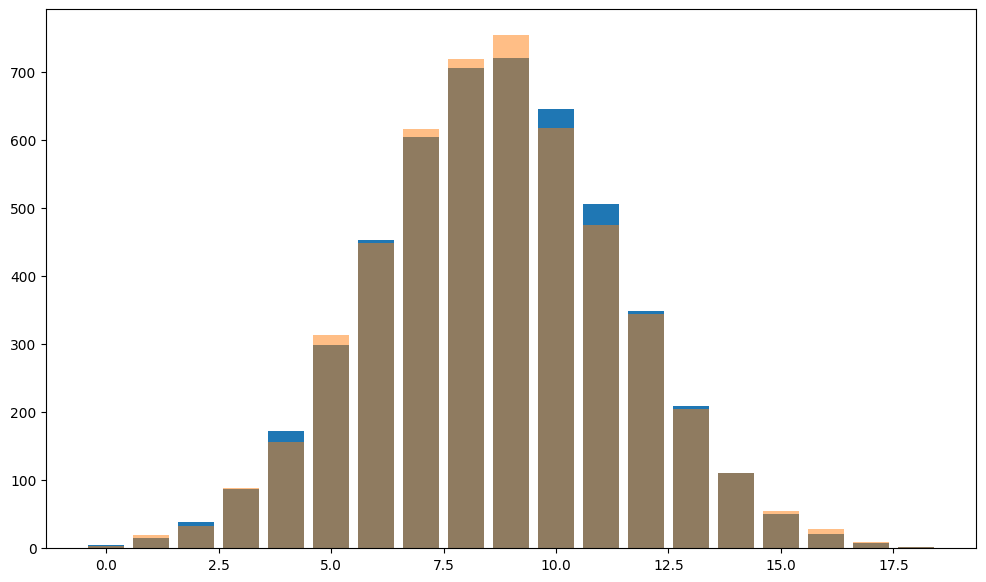

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
ax.bar(range(len(expected)), expected)
ax.bar(range(len(observed)), observed, alpha = .5)

Гипотеза о нормальности выборки уже не отвергается. (Заметьте, мы знаем точно, что она не нормальная). Вот у нас и произошла ошибка первого рода). Тем не менее, на такой выборке мы весьма вероятно сможем применить t-test (который, на самом деле, к некоторым отклонениям от нормальности не так чувствителен)

Проблема вышеописанного метода Хи-квадрат заключается в том, что количество бакетов заранее не определено и при его изменении мы точно будем получать разные результаты. Кроме того, выборка должна быть достаточно большой (формально - в 80% бакетов ожидаемое кол-во наблюдений должно быть не менее чем 5). Но есть более точный подход
http://medstatistic.ru/articles/doveritelnye-intervaly-dlya-chastot-i-doley.pdf

## QQ-plot и Критерий Шапиро-Уилка

Есть намного более удобный способ визуальной и численной проверки нормальности. Это так называемый QQ-график.

In [28]:
smpl = np.array([pylab.normal(70, 5) + pylab.exponential(1) for _ in range(100)])

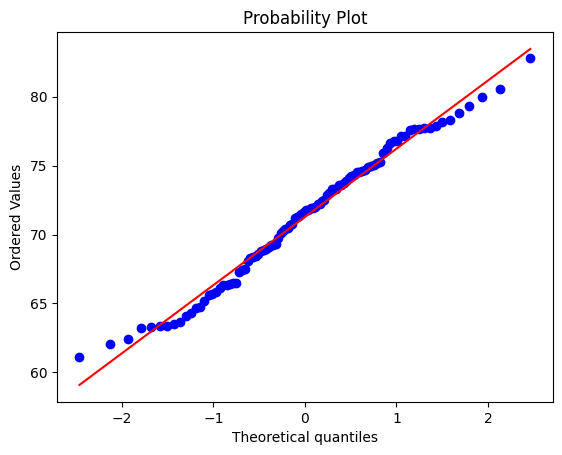

In [29]:
f = stats.probplot(smpl, dist = "norm", plot = pylab)

### Чтобы построить QQ-график, нужно:

* отсортировать выборку по неубыванию.
* каждая точка выборки ставится на QQ-график, значения отображаются по оси Y
* значение по Х - мат.ожидание квантиля распределения N(0,1), посчитанного по выборке такого как в нашем эксперименте объема.

Понятно, что в случае нормальной выборки этот график должен лечь на прямую или, по крайней мере, быть близок к ней. Если ваши точки лучше описываются не прямой, а какой-то другой функцией, то наверняка ваше выборка далека от нормальности. 

Оцифровать отклонения выборки от QQ-графика можно с помощью критерия Шапиро-Уилка. Выглядит он так:

## Критерий Шапиро-Уилка


**Выборка**    $X_n = {X_1 ... X_n}$ 

**Нулевая гипотеза**    $H_0: X \sim N(\mu,\sigma^2)$

**Альтернативная гипотеза**     $H_1: X \not\sim N(\mu,\sigma^2)$ 

Превращаем нашу выборку в вариационный ряд и строим QQ-график.

**Статистика** $W(X_n) = \dfrac{(\sum^{n}_{i=1}a_iX_{(i)})^2}{\sum^{n}_{i=1}(X_i - \overline{X})^2}$

$a_i$ - некие табулированые величины, связанные с матожиданиями квантилей $N(0,1)$

**Нулевое распределение** Табличное, в аналитическом виде не выражается.

Несмотря на то, что аналитического выражения нет, и распределение и соответствующие p-value табулированы, поэтому применять такой критерий нам ничто не помешает.

Давайте проверим нормальность с помощью критерия Шапиро-Уилка.

In [30]:
stats.shapiro(smpl)

ShapiroResult(statistic=0.9829479455947876, pvalue=0.22396181523799896)

Нормальность снова не отвергается :)

## критерии различаются по мощности

## Критерий Jarque-Bera
Тест Жарка-Бера проверяет, соответствуют ли выборочные данные по асимметрии и эксцессу нормальному распределению.
Следуя документации, устойчивые результаты этот критерий показывает с выборками объема от 2000 элеменетов. Но если в выборке сильно нарушены асимметрия и эксцесс, то можно заметить разницу в выборках более малого объема.

**Выборка**    $X_n = {X_1 ... X_n}$ 

**Нулевая гипотеза**    $H_0: X \sim N(\mu,\sigma^2)$

**Альтернативная гипотеза**     $H_1: X \not\sim N(\mu,\sigma^2)$ 


In [31]:
stats.jarque_bera(smpl)

SignificanceResult(statistic=2.613253660022396, pvalue=0.27073174207220996)

In [32]:
smpl2 = np.array([pylab.gamma(70, 5) for _ in range(500)])

In [33]:
stats.jarque_bera(smpl2)

SignificanceResult(statistic=2.1964466376078624, pvalue=0.33346301517425514)

## А зачем нам вообще проверять нормальность?

Часто используются тесты, предполагающие нормальность данных, но t-тесты, например, работают и в случае некоторого отклонения от нормальности. В реальной жизни нормальных выборок не существует, потому что нормальное распределение - модель, она должна **в каком-то смысле** адекватно описывать реальную ситуацию. Кроме того, проверка нормальности - тоже статистический тест, а значит на маленьких выборках мы почти никогда не сможем отвергнуть нормальность, а на очень больших выборках – почти всегда будем ее отвергать (оцени критерий Жарки-Бера). Поэтому предлагаю следующий способ использования:

1) Смотрим на специфику наших данных. Если они категориальные или бинарные, лучше использовать специальные критерии для них.

2) Если величина непрерывная, постройте QQ-график. Если на нем выборка не очень сильно отклоняется от прямой, можно смело применять устойчивые к небольшим отклонениям методы. Например критерий Стьюдента.

3) Если ваш метод все-таки чувствителен к нормальности, оцифруйте отклонение с помощью критерия Шапиро-Уилка 

4) Если критерий Шапиро-Уилка отвергает нормальность, лучше применить другой метод (например непараметрический, который не делает никаких предположений о конкретном характере распределения)
